In [1]:
from __future__ import print_function, division
import numpy as np
import sys, os
from astropy.table import Table
from astropy.io import fits
import fitsio
import matplotlib.pyplot as plt

In [2]:
# Catalog provided by John Moustakas
cat = Table.read('/Users/rongpu/Downloads/primus-zcat-moustakas.fits')

In [3]:
print(len(cat))

78916


In [4]:
cat[:5]

SURVEY,FIELD,FIELDNUM,PRIMARY,TARG_MAG,INSLITS,ISFSTAR,RA,DEC,MASK,NIGHT,TYPE,SN1,SN2,BADEXTRACT,NAME,ISGOOD,ISDUP,ISBEST,INWINDOW,INWINDOW_2MASK,SKY,EXTRACT_RA,EXTRACT_DEC,TARG_WEIGHT,PRIMUS_TARGET,PRIMUS_TARGET2,PRIORITY,CHANCES,SPARSE,CHOSEN,SPARSELY,MULTIPLE,NCONFLICTS,NCONFLICTS_USED,NMCOVER,NMGOT,COLLISION,AVG_COLLISION,ADDITIONAL_WEIGHT,OBJNAME,ZBEST_PHOTOZ_GAL,ZBESTERR_PHOTOZ_GAL,ZCONF_PHOTOZ_GAL,CHI2BEST_PHOTOZ_GAL,INDEXBEST_PHOTOZ_GAL,ZBEST_AGN,ZBESTERR_AGN,ZCONF_AGN,CHI2BEST_AGN,INDEXBEST_AGN,CHI2BEST_STAR,ZPRIMUS,ZPRIMUS_ERR,ZPRIMUS_CLASS,ZPRIMUS_SUBCLASS,ZPRIMUS_ZWARNING,ZPRIMUS_ZCONF,CH1MAG,ZSPEC_FLAG,ZPRIMUS_ORIGINAL
bytes12,bytes10,int16,int16,float32,int16,int16,float64,float64,bytes8,bytes8,bytes4,float32,float32,int32,bytes8,int16,int16,int16,int16,int16,int16,float64,float64,float32,int32,int32,float32,float32,float32,int32,int32,int16,int16,int16,int16,int16,float32,float32,float32,bytes10,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,bytes6,bytes6,int32,int16,float32,int16,float32
cfhtls_xmm,cfhtls_xmm,10,1,20.945198,1,0,34.2450992,-4.5560321,cxma0186,ut071011,SLIT,38.54771,41.411537,0,ob01915,1,0,1,1,1,0,34.24505416552226,-4.556066666709052,2.5267582,3,4096,208.0,1.0,0.45,1,1,0,4,4,2,1,0.8781709,0.87947565,1.0,0186-01915,0.4538307,1.5498335e-05,3.0,239.6628,39,3.1478107,0.004899214,4.0,733.71216,17,418.59125,0.4538307,1.5498335e-05,GALAXY,xx,0,3,19.897089,0,-1.0
cfhtls_xmm,cfhtls_xmm,10,1,22.430498,1,0,34.2364195,-4.5433228,cxma0186,ut071011,SLIT,17.065395,18.884237,1048576,ob01921,1,0,1,1,1,0,34.23637499809265,-4.543358333375719,3.282032,3,4096,208.0,1.0,0.35999998,1,1,0,5,5,2,1,0.8443075,0.84635913,1.0,0186-01921,0.32319716,5.2756377e-06,4.0,304.7822,110,1.1022946,0.006846103,3.0,327.15567,15,476.91937,0.32319716,5.2756377e-06,GALAXY,xx,0,4,-999.0,0,-1.0
cfhtls_xmm,cfhtls_xmm,10,1,21.413969,1,0,34.231695,-4.5382279,cxma0186,ut071011,SLIT,28.719673,28.183416,0,ob00182,1,0,1,1,1,0,34.231650002797444,-4.538263888888888,1.7987,3,4096,208.0,1.0,0.59999996,1,1,0,3,3,2,1,0.9227858,0.9265952,1.0,0186-00182,0.5217893,2.5238129e-05,3.0,292.55423,29,3.0652144,0.0041555734,4.0,474.1054,17,371.86844,0.5217893,2.5238129e-05,GALAXY,xx,0,3,20.689552,0,-1.0
cfhtls_xmm,cfhtls_xmm,10,1,21.339968,1,0,34.2405247,-4.5332963,cxma0186,ut071011,SLIT,22.372366,21.4933,1048576,ob02305,1,0,1,1,1,0,34.2404750029246,-4.533333333333333,1.0271649,3,4096,208.0,1.0,1.0,1,1,0,2,2,2,1,0.96350646,0.97355354,1.0,0186-02305,0.84021866,3.234342e-05,4.0,359.38123,39,3.843419,0.006794582,3.0,860.3148,17,555.0193,0.84021866,3.234342e-05,GALAXY,xx,262144,4,19.10041,0,-1.0
cfhtls_xmm,cfhtls_xmm,10,1,21.992168,1,0,34.2456868,-4.5287476,cxma0186,ut071011,SLIT,18.44189,18.024757,1048576,ob00949,1,0,1,1,1,0,34.245637496312455,-4.528786111407809,1.0271649,3,4096,208.0,1.0,1.0,1,1,0,2,2,2,1,0.96350646,0.97355354,1.0,0186-00949,0.61476606,5.2891763e-05,2.0,289.96036,116,1.5193183,0.011959982,2.0,303.79422,14,481.84937,0.61476606,5.2891763e-05,GALAXY,xx,0,2,-999.0,0,-1.0


In [5]:
np.all(cat['ISDUP']==0)

True

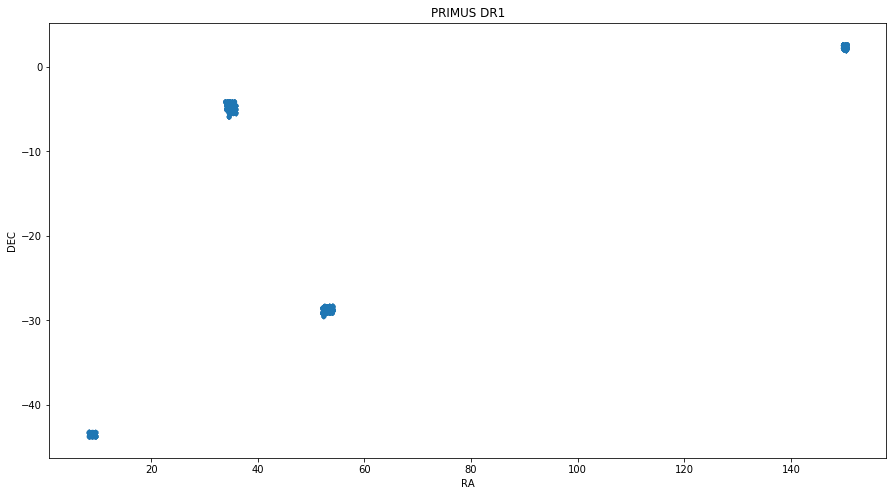

In [6]:
plt.figure(figsize=(15, 8))
plt.plot(cat['RA'], cat['DEC'], '.', markersize=0.4, alpha=0.5)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('PRIMUS DR1')
plt.show()

__Check for duplicates__

In [7]:
from __future__ import division, print_function
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import sys, os
home = os.path.expanduser("~")+'/'
sys.path.append(home+'git/Python/user_modules/')
import match_coord

1116 objects with a nearby neighbor


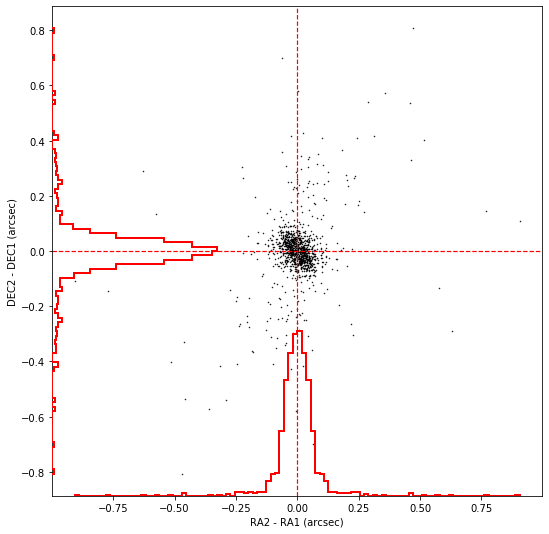

1116 1.41%


In [8]:
n_duplicates, idx1, idx2 = match_coord.match_self(cat['RA'], cat['DEC'], search_radius=1., 
                                                  return_indices=True, plot_q=True)
print(n_duplicates, '{:.2f}%'.format(n_duplicates/len(cat)*100))

989 objects with a nearby neighbor


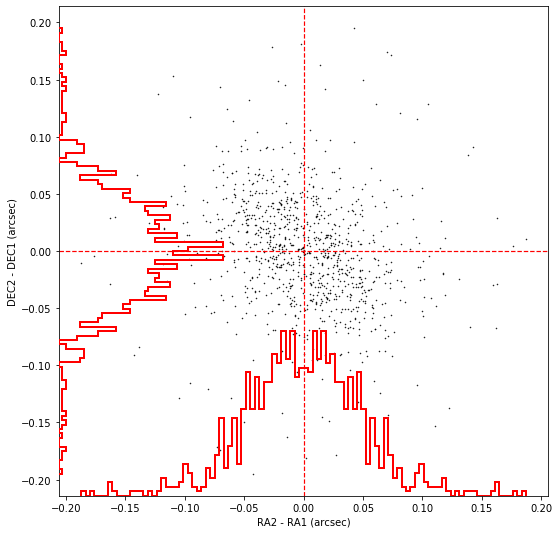

989 1.25%


In [9]:
n_duplicates, idx1, idx2 = match_coord.match_self(cat['RA'], cat['DEC'], search_radius=0.2, 
                                                  return_indices=True, plot_q=True)
print(n_duplicates, '{:.2f}%'.format(n_duplicates/len(cat)*100))